
# Projet 4 : étude des ventes de cette année de l'entreprise (analyse)

Dans ce document, nous allons étudier les ventes de l'année de l'entreprise en essayant de détailler un maximum nos démarches et en les rendant le plus simple à comprendre possible, afin de délivrer des informations claires et utiles.

## Sommaire

#### Perte de CA durant l'année
Avant de commencer notre étude en détails après un survole des données nous nous somme retrouver à un problème sur le CA que nous allons détailler dans cette partie

- [Perte de CA, Détection et Actions](#Perte-de-CA)


#### Dans un premier temps nous nous pencherons sur l'étude des clients

- [Étude du portefeuille client](#Le-portefeuille-client)
- [Étude des acheteurs](#Les-acheteurs)
- [Étude des dépenses des clients](#Etude-des-depenses-des-clients)

#### Ensuite nous observerons les produits

- [Étude du catalogue de produits](#Le-catalogue)
- [Étude des ventes de l'année](#Etude-des-produits-acheter)


#### Nous nous intéresserons a l'étude des paniers

- [Etude des paniers](#Etude-des-paniers)


#### Finalement nous étudierons de possible corrélation entre les différentes données

- [Sex et catégorie](#Correlation:-Sexes-Catégories)
- [Ages et montant total d'achat](#Correlation:-Ages-et-montant-total-d'achat)
- [Age et fréquence d'achat](#Correlation:-Age-et-fréquence-d'achat)
- [Age et nombre de produits moyen acheté](#Correlation:-Age-et-nombre-de-produits-moyen-acheté)
- [Age et categories acheté](#Correlation:-Age-et-categories-acheté)





In [1]:

#Import des différentes Librairie

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import scipy.stats as st
import numpy as np

plt.style.use('seaborn-deep')
%matplotlib inline

#Chemin du dossier pour les images de graph
dossierImg = "./image_Graph/"


In [2]:

#Import des données
cus = pd.read_csv("data/customer_formate.csv")
pro = pd.read_csv("data/product_formate.csv")
tra = pd.read_csv("data/transaction_formate.csv",parse_dates=[1])


### Presentation des données

In [3]:
cus.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
pro.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
tra.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242



Pour plus de simplicité, nous allons ajouter une colonne avec l'âge de chaque personne en plus de leur date de naissance. Le tout sera plus lisible par la suite.


In [6]:
date = dt.datetime.now()

cus['age'] = date.year - cus['birth']

cus.head()

,client_id,sex,birth,age
0,c_4410,f,1967,53
1,c_7839,f,1975,45
2,c_1699,f,1984,36
3,c_5961,f,1962,58
4,c_5320,m,1943,77


### Création d'un DataFrame pour l'étude des transactions


Pour l'étude sur les dépenses et transaction de nos clients, nous créerons un nouveau tableau regroupant pour chaque transaction les informations du client et de l'article concerner.

In [7]:

tab_transactionsComplete = pd.DataFrame(tra)
tab_transactionsComplete = pd.merge(tab_transactionsComplete, pro, left_on='id_prod', right_on='id_prod', left_index=True, right_index=False, how='left')
tab_transactionsComplete = pd.merge(tab_transactionsComplete, cus, left_on='client_id', right_on='client_id', left_index=False, right_index=False, how='left')
tab_transactionsComplete.head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,43
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,20
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,41
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,57
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,40


### Perte de CA


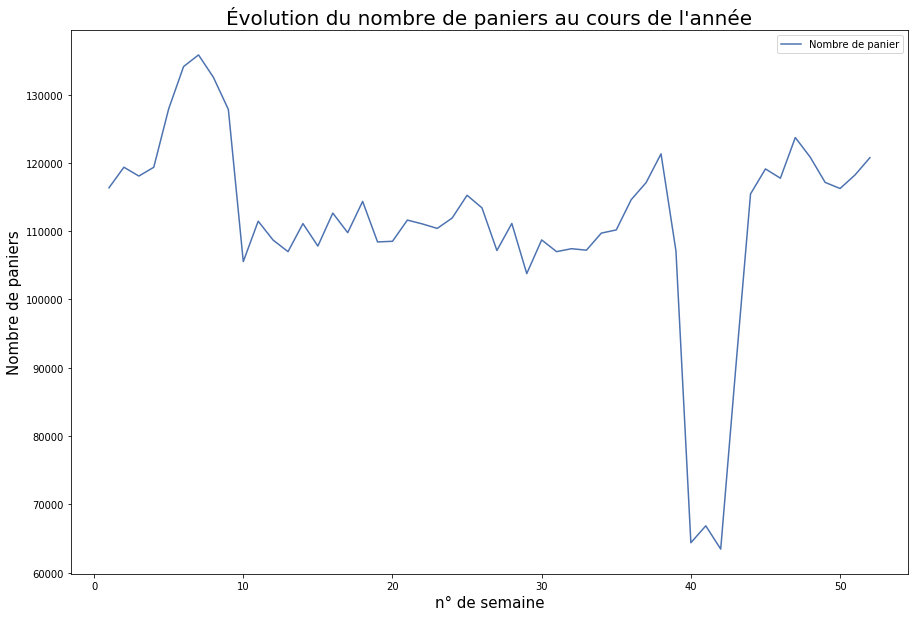

In [8]:

#Étude du nombre de paniers au cours du temp(semaine)

panier_parSemaine = pd.pivot_table(tab_transactionsComplete,values='price', index=tab_transactionsComplete.date.dt.week, aggfunc='sum')
plt.figure(figsize=(15,10))
plt.plot(panier_parSemaine, label= "Nombre de panier")
plt.title("Évolution du nombre de paniers au cours de l'année",fontsize=20)
plt.ylabel("Nombre de paniers",fontsize=15)
plt.xlabel("n° de semaine",fontsize=15)
plt.legend()
plt.savefig(dossierImg + "graph1.png")
plt.show()



Avec la création de notre nouveau tableau, nous avons pu avoir une vision globale des dépenses de nos clients (notre Chiffre d'affaires), et nous avons trouver une anomalie : ce dernier subit un fort recule aux alentours de la quarantième semaine soit environs octobre.


#### Étude plus approfondi

Dans la prochaine partie, j'ai regardé plus en profondeur d'où pouvait venir de telle résultat.


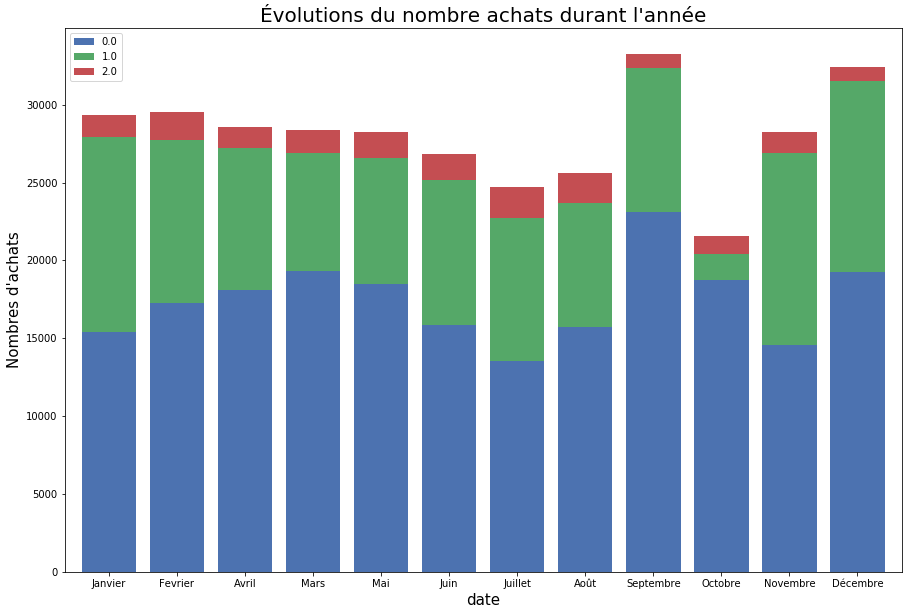

In [9]:

#Anciennement "t"
tab_nombreProdTime = pd.pivot_table(tab_transactionsComplete, values='id_prod', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='count')
tab_nombreProdTime = tab_nombreProdTime.reset_index()

tab_nombreProdTime[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('date',fontsize=15)
plt.ylabel("Nombres d'achats",fontsize=15)
plt.title("Évolutions du nombre achats durant l'année",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph2.png")
plt.show()



Ce graphe nous montre clairement un changement soudain dans la tendance d'achats de nos clients. On peut voir une très forte diminution des ventes des produits de catégorie 1. Regardons les chiffres.


In [10]:

#Nombres d'achats par catégories durant janvier
tab_nombreProdTime[tab_nombreProdTime['date'] == 1]


categ,date,0.0,1.0,2.0
0,1,15381,12560,1370


In [11]:

#Nombres d'achats par catégories durant Octobre
tab_nombreProdTime[tab_nombreProdTime['date'] == 10]


categ,date,0.0,1.0,2.0
9,10,18751,1666,1160


In [12]:

#Nombres d'achats moyens pour la catégorie 1 durant l'année
tab_nombreProdTime[1].mean()


9144.583333333334


Les chiffres vont dans notre sens. Nous savons donc que les ventes des objets de catégorie 1 diminue, mais est cela qui impacte tant notre CA ?


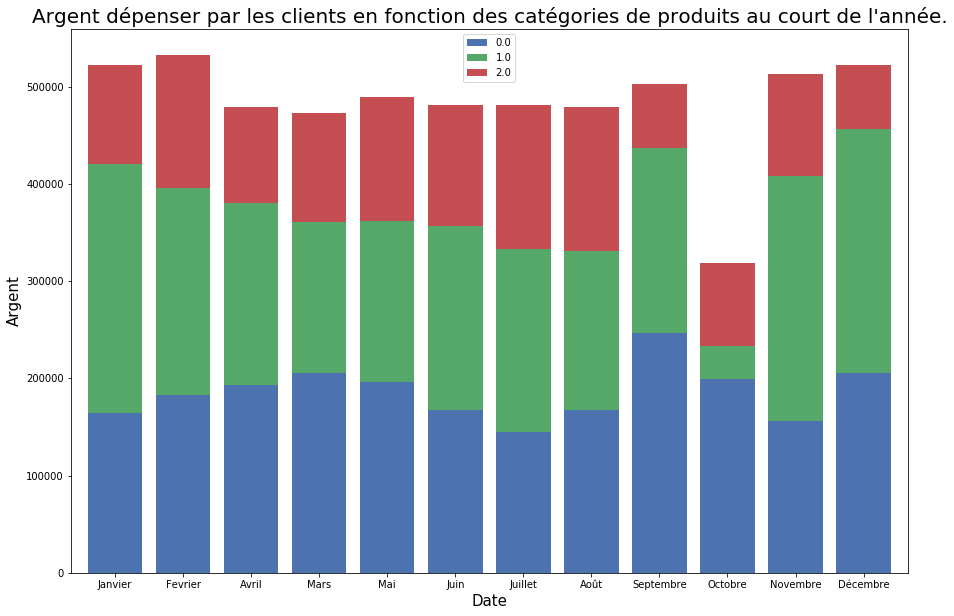

In [13]:

#Anciennement "y"
tab_gainparCategTime = pd.pivot_table(tab_transactionsComplete, values='price', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='sum')
tab_gainparCategTime = tab_gainparCategTime.reset_index()

tab_gainparCategTime[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.xlabel('Date',fontsize=15)
plt.ylabel("Argent",fontsize=15)
plt.title("Argent dépenser par les clients en fonction des catégories de produits au court de l'année.",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph3.png")

plt.show()


L'argent dépensé par nos clients concorde avec le nombre de produits vendu.

In [14]:

#Jours où les produits de catégorie 1 sont vendu
tab_transactionsComplete[(tab_transactionsComplete.date.dt.month == 10) & (tab_transactionsComplete.categ == 1)].date.dt.day.sort_values().unique()


array([ 1, 28, 29, 30, 31])


On voit que durant le mois d'octobre les produits de catégorie n°1 ne sont acheter que sur 5 jours. (1,28,29,30,31)


In [15]:

#Produits sans prix
tab_transactionsComplete[tab_transactionsComplete.price.isna()]


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972,48
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973,47
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975,45
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982,38
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988,32
...,...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979,41
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983,37
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984,36
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973,47



Nous avons également remarqué qu'un produits ne possédait ni prix ni catégorie, mais qu'il étais tout de même utiliser lors de transactions.


In [16]:

tab_transactionsComplete[tab_transactionsComplete.price.isna()].id_prod.unique()


array(['0_2245'], dtype=object)


Pour résumer ce que nous avons pour le moment, il y a un produit dans notre base de données qui n'appartient a aucune catégorie et qui n'a pas de prix.

Les 103 transactions effectuées avec ce produit ne sont donc pas prix en compte dans notre calcul du chiffre d'affaire.

Ce produit pourrait donc expliquer la baisse en octobre.


In [17]:

print ("La marge de différence est de {} € à {} € sur le chiffre d'affaire.".
       format(tab_transactionsComplete[tab_transactionsComplete.categ == 0].price.min() * len(tab_transactionsComplete[tab_transactionsComplete.price.isna()]),
              tab_transactionsComplete[tab_transactionsComplete.categ == 0].price.max() * len(tab_transactionsComplete[tab_transactionsComplete.price.isna()])
             )
      )


La marge de différence est de 63.86 € à 4221.97 € sur le chiffre d'affaire.


In [18]:

liste = tab_transactionsComplete[tab_transactionsComplete.price.isna()].date.dt.month
compte = {}.fromkeys(set(liste),0)

for valeur in liste:
    compte[valeur] += 1

compte

{1: 5, 2: 11, 3: 9, 4: 14, 5: 8, 6: 7, 7: 4, 8: 9, 9: 12, 10: 7, 11: 10, 12: 7}


On peut voir que le produit est présent sur différents mois, nous allons tout de même le corriger.


### Imputation des données

L'id du produit nous indique ca catégorie. Tant qu'au prix, nous allons prendre la moyenne de cette catégorie

In [19]:

prixMoyenAvantModif = tab_transactionsComplete[tab_transactionsComplete.categ==0].price.mean()

tab_transactionsComplete.loc[tab_transactionsComplete.price.isna(),'price'] = prixMoyenAvantModif
tab_transactionsComplete.loc[tab_transactionsComplete.categ.isna(),'categ'] = 0

tab_transactionsComplete[tab_transactionsComplete.id_prod == '0_2245'].head()


,id_prod,date,session_id,client_id,price,categ,sex,birth,age
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,10.646828,0.0,m,1972,48
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,10.646828,0.0,m,1973,47
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,10.646828,0.0,f,1975,45
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,10.646828,0.0,f,1982,38
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,10.646828,0.0,m,1988,32


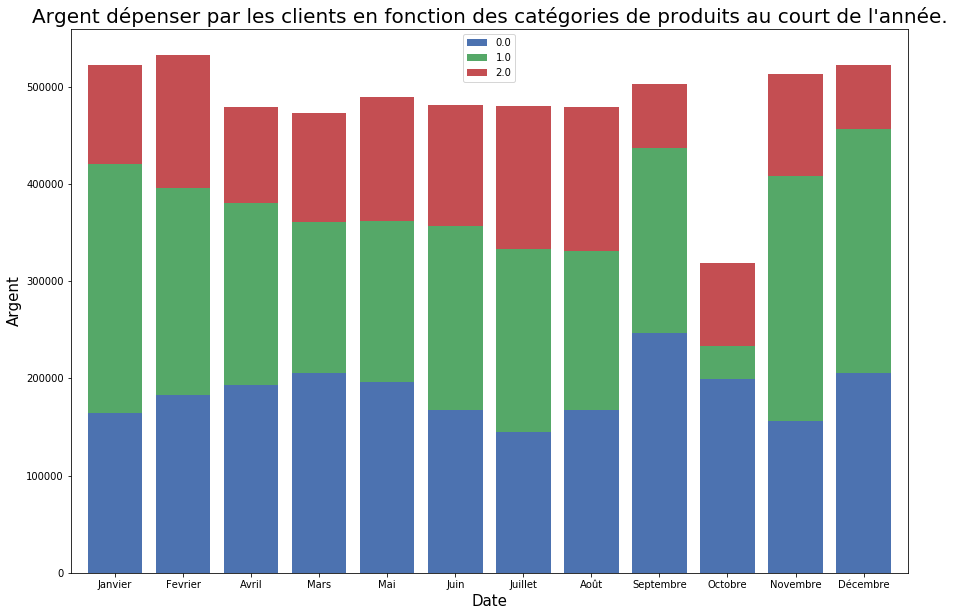

In [20]:

#Anciennement "y"
tab_gainparCategTime_corrigerProdManquant = pd.pivot_table(tab_transactionsComplete, values='price', index= [tab_transactionsComplete.date.dt.month], columns='categ', aggfunc='sum')
tab_gainparCategTime_corrigerProdManquant = tab_gainparCategTime_corrigerProdManquant.reset_index()

tab_gainparCategTime_corrigerProdManquant[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))

plt.xlabel('Date',fontsize=15)
plt.ylabel("Argent",fontsize=15)
plt.title("Argent dépenser par les clients en fonction des catégories de produits au court de l'année.",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph4.png")

plt.show()


Il semble que la modification de ce produits n'explique pas tout.

-------------------------------------------------------------------------------------

# Étude des données

## Les clients
Dans cette section, nous allons étudier la répartition de l'âge et du sexe des clients issu du portefeuille clients, mais également des transaction au cours de l'année.

### Le portefeuille client

Dans cette partie, nous allons observer les clients uniques dans notre base de données. (*customer_formate.csv*)

In [21]:
print("\n age moyen :{} ans, \n un ecart-type de {}, \n age median est de {} ans, \n age modale a {} ans, \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % cus['age'].mean(), 
              "%.2f" % cus['age'].std(),
              int(cus['age'].median()),
              cus['age'].mode()[0],
              cus.age.min(),
              cus.age.max()))



 age moyen :41.72 ans, 
 un ecart-type de 16.92, 
 age median est de 41 ans, 
 age modale a 16 ans, 
 fourchette d'age de 16 ans a 91 ans


In [22]:
print("\n Femmes :{} \n Hommes : {} \n {} clients differents "
      .format(cus.sex.value_counts()['f'],cus.sex.value_counts()['m'],cus.client_id.value_counts().sum()))



 Femmes :4490 
 Hommes : 4131 
 8621 clients differents 


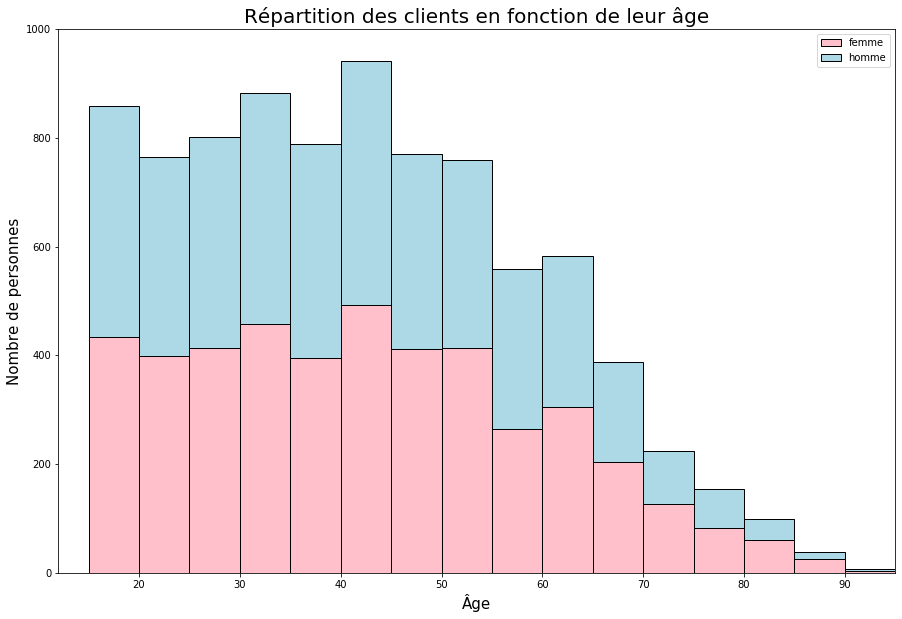

In [23]:

f = cus['age'][cus['sex']=='f']
m = cus['age'][cus['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'lightBlue'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Âge',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Répartition des clients en fonction de leur âge',fontsize=20)
plt.axis([12, 95, 0, 1000])
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph5.png")

plt.show()



Nous séparons les clients dans la base de données et ces mêmes clients qui ont acheter quelque chose sur notre site.

## Les acheteurs
Nous étudions ici la population de clients présente dans nos transactions.


In [24]:

df_Acheteur = tab_transactionsComplete.copy()
df_Acheteur = df_Acheteur.drop(columns=(['id_prod', 'date', 'session_id', 'price', 'categ']))
df_Acheteur.head()


,client_id,sex,birth,age
0,c_4450,f,1977,43
1,c_277,f,2000,20
2,c_4270,f,1979,41
3,c_4597,m,1963,57
4,c_1242,f,1980,40


In [25]:

print("\n age moyen :{} ans, \n ecart-type de {},  \n age median est de {} ans, \n age modale a {} ans, \n fourchette d'age de {} ans a {} ans"
      .format("%.2f" % df_Acheteur['age'].mean(), 
              "%.2f" % df_Acheteur['age'].std(),
              int(df_Acheteur['age'].median()),
              df_Acheteur['age'].mode()[0],
              df_Acheteur.age.min(),
              df_Acheteur.age.max()))



 age moyen :42.18 ans, 
 ecart-type de 13.52,  
 age median est de 40 ans, 
 age modale a 40 ans, 
 fourchette d'age de 16 ans a 91 ans


In [26]:

print("\n Femmes :{} \n Hommes : {} \n {} acheteurs au long de cette année"
      .format(df_Acheteur.sex.value_counts()['f'],
              df_Acheteur.sex.value_counts()['m'],
              df_Acheteur.client_id.value_counts().sum()))



 Femmes :167575 
 Hommes : 169241 
 336816 acheteurs au long de cette année


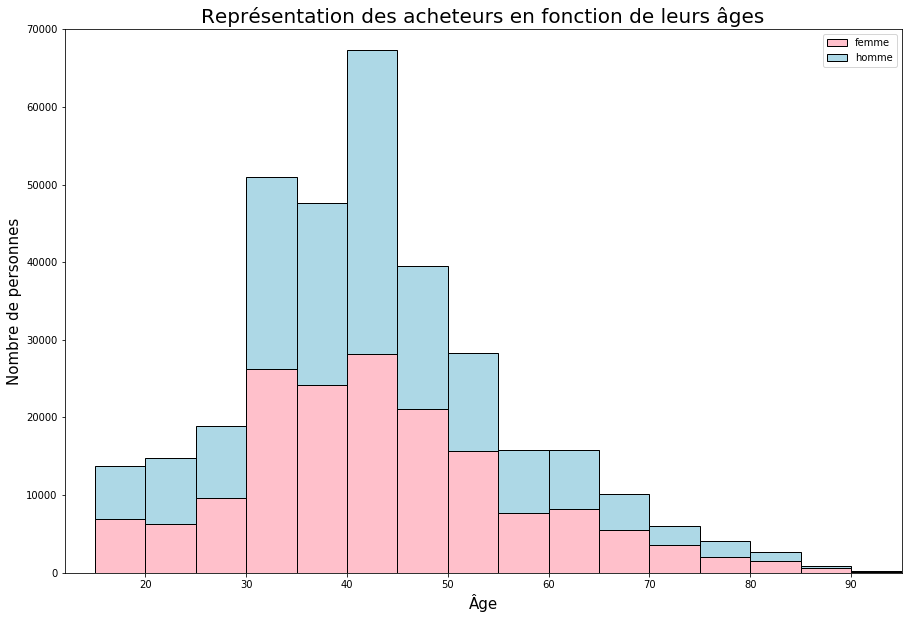

In [27]:

f = df_Acheteur['age'][df_Acheteur['sex']=='f']
m = df_Acheteur['age'][df_Acheteur['sex']=='m']

plt.figure(figsize=(15,10))

plt.hist([f, m],
         bins = range(10,100,5),
         color = ['pink', 'lightBlue'],
         edgecolor = 'black',
         label = ['femme', 'homme'],
         histtype = 'barstacked')


plt.xlabel('Âge',fontsize=15)
plt.ylabel('Nombre de personnes',fontsize=15)
plt.title('Représentation des acheteurs en fonction de leurs âges',fontsize=20)
plt.axis([12, 95, 0, 70000])
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph6.png")

plt.show()



Si nous devions retenir une chose ce cette partie, ce serai que les clients du portefeuille clients et les acheteurs sont differents. Nous avons par exemple une majorité de Femme dans ce portefeuille, mais ce sont les Hommes qui achètent le plus sur notre site.



## Etude des depenses des nos clients 

Maintenant nous allons nous intéresser aux dépenses de nos clients.


In [28]:

depenseParClient = pd.pivot_table(tab_transactionsComplete, values='price', index='client_id',aggfunc='sum')
depenseParClient = depenseParClient.reset_index()

print("\n Dépense moyenne {} €, \n Dépense median {} €, \n écart-type : {}, \n variance : {}"
      .format("%.2f" % depenseParClient.price.mean(),
              "%.2f" % depenseParClient.price.median(),
              "%.2f" % depenseParClient.price.std(),
              "%.2f" % depenseParClient.price.var()))



 Dépense moyenne 674.15 €, 
 Dépense median 501.31 €, 
 écart-type : 2565.99, 
 variance : 6584294.47


In [29]:

#Top 10 clients
depenseParClient.sort_values(by='price',ascending=False).head(10)


,client_id,price
677,c_1609,162007.340000
4388,c_4958,144257.210000
6337,c_6714,73218.633656
2724,c_3454,54464.213656
7715,c_7959,2564.250000
7791,c_8026,2548.316828
3870,c_4491,2540.530000
1268,c_2140,2527.010000
8195,c_8392,2515.980000
7120,c_7421,2511.980000



En affichant la liste des clients les plus dépensiers, on peut voir que certains clients sont fidèles à notre entreprise et très dépensier.


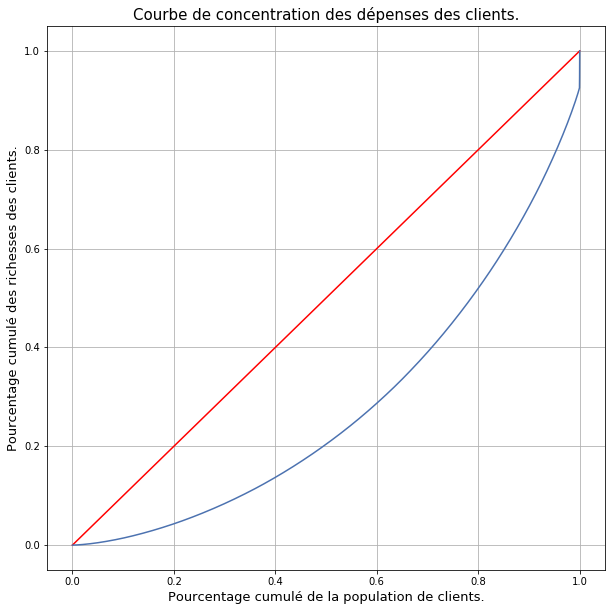

In [30]:

tab_depenseClientSort = depenseParClient.copy()
tab_depenseClientSort = tab_depenseClientSort.sort_values(by='price')
tab_depenseClientSort = tab_depenseClientSort.reset_index()
tab_depenseClientSort = tab_depenseClientSort.drop(columns='index')


dep = tab_depenseClientSort['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des dépenses des clients.', fontsize=15)
plt.ylabel('Pourcentage cumulé des richesses des clients.', fontsize=13)
plt.xlabel('Pourcentage cumulé de la population de clients.', fontsize=13)
plt.grid(True)
plt.savefig(dossierImg + "graph7.png")

plt.show()


In [31]:

# Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où : "[:-1]"
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 

# Aire entre la 1e bissectrice et la courbe de Lorenz.
S = 0.5 - aire_ss_courbe 
gini = 2*S

gini


0.4398980967377766


On peut voir que la courbe bleue qui représente la "richesse" de nos clients à un comportement plutôt étrange en haut à droite. On peut apprendre de cette courbe que la répartition au sein des clients est inégale, dans le sens où certains clients dépensent beaucoup plus. On peut voir en haut de notre courbe qu'environs moins de 1 % des clients représentent environ 10 % des dépenses des clients et par extension le CA de notre entreprise.


In [32]:

#Dépense des 5 clients les plus dépensier
Top5 = depenseParClient.sort_values(by='price',ascending=False)[:5].price.sum() * 100 / depenseParClient.price.sum()
Top5.round(2)


7.53


Nous avons donc 5 clients (0.001 % du portefeuille), qui ont apporter 7.5 % du CA de l'entreprise.



### Dépense en fonction de l'âge

Ici, nous allons voir les dépenses des clients en fonction de leur âge.


In [33]:

achatParAge = pd.pivot_table(tab_transactionsComplete, values='price',index='age', aggfunc='sum' )
achatParAge = achatParAge.reset_index()

tranche_age = 5
test = np.arange(15,100,tranche_age)
groupes_age=[]

for ind, nb in enumerate(test):
    a=0
    a = achatParAge[(achatParAge['age'] >= nb) & (achatParAge['age'] < nb+tranche_age)].sum()
    d={
        'age':'{}~{}'.format(nb, nb+tranche_age),
        'price':a[1].round(3)
    }
    groupes_age.append(d)
    
df_trancheAge = pd.DataFrame(groupes_age)


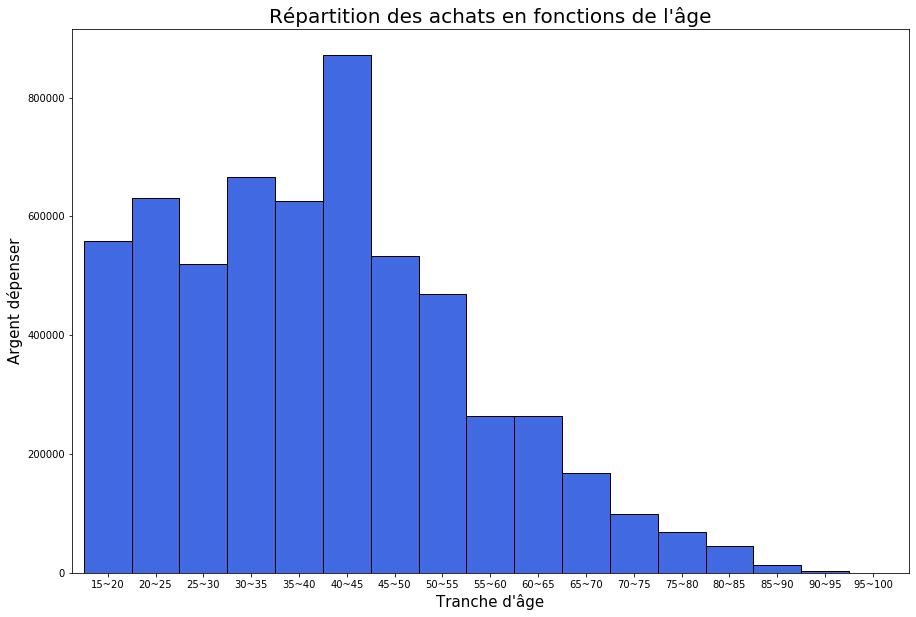

In [34]:

df_trancheAge.plot.bar('age','price',
                       figsize=(15,10),
                       rot =0,
                       width = 1,
                       edgecolor = 'black',
                       color='royalblue',
                      legend=None)

plt.xlabel("Tranche d'âge",fontsize=15)
plt.ylabel("Argent dépenser",fontsize=15)
plt.title("Répartition des achats en fonctions de l'âge",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph8.png")

plt.show()



Nous avons si dessus la répartition des achats en fonctions de l'âge de nos clients. Il est assez simple de voir qu'une des tranches d'âge sort du lot, elle est donc plus profitable à notre entreprise.



# Étude des produits
Dans la parti suivant nous allons nous intéresser a la repartions des prix des produits et nous étudierons les catégories de ces derniers

## Le catalogue

Commençons par nous pencher sur le catalogue de produit.


In [35]:

nb_deProduitParCateg = pro.categ.value_counts()


In [36]:

print('\n prix maximum: {} €,  \n prix minimum : {} €, \n prix moyen : {} €, \n ecat-type : {}, \n prix median: {} €, \n prix modale : {} €, \n nombre de produits : {}'
      .format(pro.price.max(),
              pro.price.min(),
              "%.2f" % pro.price.mean(), 
              "%.2f" % pro.price.std(), 
              pro.price.median(),
              pro.price.mode()[0],
              pro.id_prod.value_counts().sum()))



 prix maximum: 300.0 €,  
 prix minimum : 0.62 €, 
 prix moyen : 21.86 €, 
 ecat-type : 29.85, 
 prix median: 13.075 €, 
 prix modale : 4.99 €, 
 nombre de produits : 3286


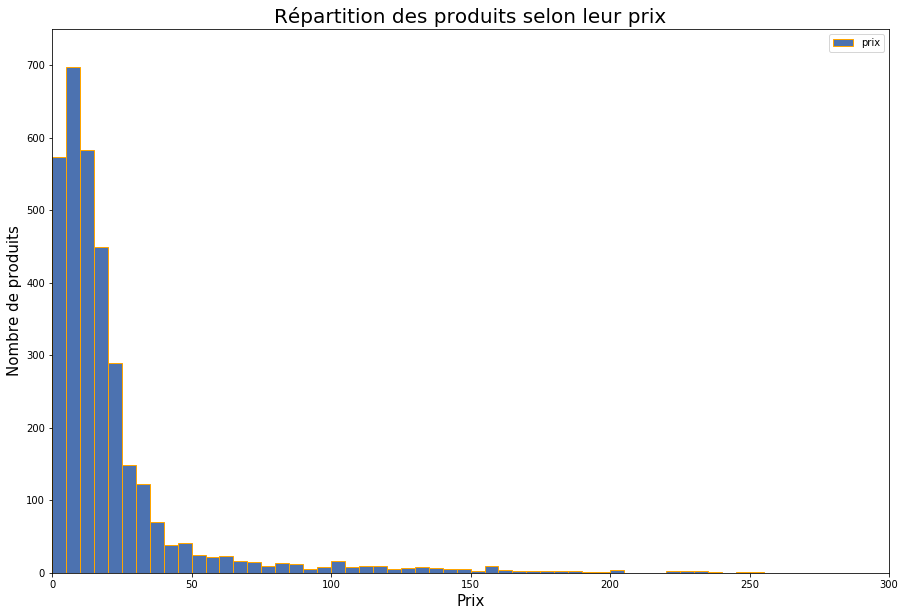

In [37]:

pro['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produits',fontsize=15)
plt.title('Répartition des produits selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 750])
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph9.png")

plt.show()



Ce graphe nous présente la répartition du nombre de produits selon leur prix, plus la barre et haute plus il y a de produits avec le prix en question. Nous pouvons voir que nous avons une grande concentration de produits à la gauche du graphe, ce qui traduit que beaucoup des produits vendu par l'entreprise ne sont pas très chère et qu'une petite partie de notre catalogue a un prix beaucoup plus élever.


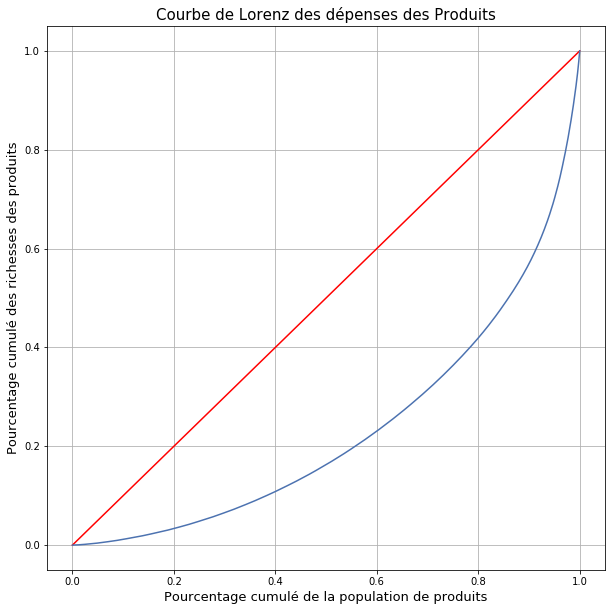

In [38]:

tab_prixProdLorenz = pro.copy()
tab_prixProdLorenz = tab_prixProdLorenz.sort_values(by='price')
tab_prixProdLorenz = tab_prixProdLorenz.reset_index()
tab_prixProdLorenz = tab_prixProdLorenz.drop(columns=['categ','index'])


dep = tab_prixProdLorenz['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de Lorenz des dépenses des Produits', fontsize=15)
plt.ylabel('Pourcentage cumulé des richesses des produits', fontsize=13)
plt.xlabel('Pourcentage cumulé de la population de produits', fontsize=13)
plt.grid(True)
plt.savefig(dossierImg + "graph10.png")

plt.show()


In [39]:

# Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où : "[:-1]"
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 

# Aire entre la 1e bissectrice et la courbe de Lorenz.
S = 0.5 - aire_ss_courbe 
gini = 2*S

gini


0.5321753235061014

### Les catégories

Explorons un peut plus en détails les différentes catégories de produits.


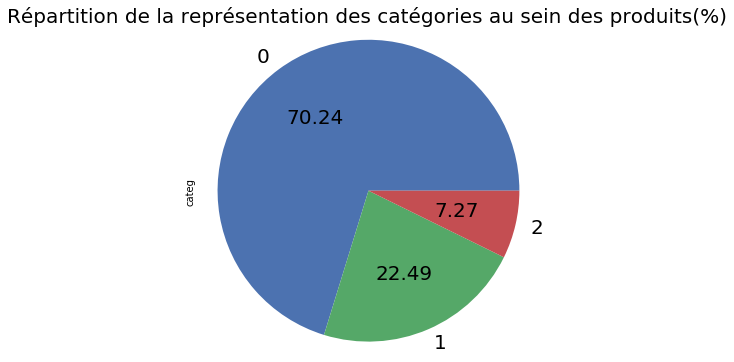

In [40]:

nb_deProduitParCateg.plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Répartition de la représentation des catégories au sein des produits(%)', fontsize=20)
plt.axis('equal')
plt.savefig(dossierImg + "graph11.png")

plt.show()


In [41]:

prixMoyenCateg = pd.pivot_table(tab_transactionsComplete, index='categ', values='price', aggfunc='mean')
prixMoyenCateg.round(3)


,price
categ,
0.0,10.647
1.0,20.480
2.0,75.175



Nous avons pu voir que les produits appartiennent majoritairement a la catégories 0 (70 %), et que cette dernière a un prix moyen de 10.
La catégorie la plus onéreuse (75 €), ne représente que 7 % du portefeuille.


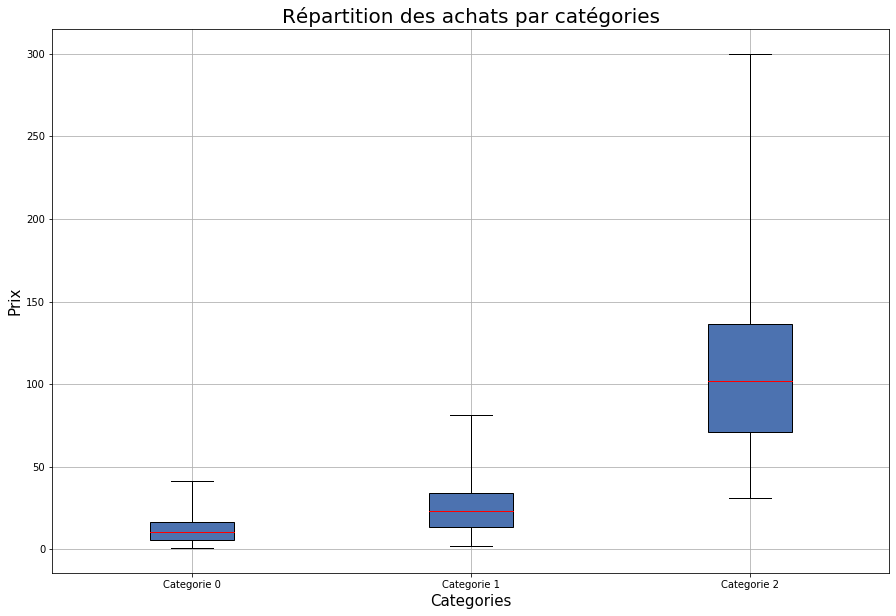

In [42]:

repParCateg_catalogue = pro.copy()

#creation de sous liste
prixCateg0 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 0 ]['price']
prixCateg1 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 1 ]['price']
prixCateg2 = repParCateg_catalogue[repParCateg_catalogue['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categories', fontsize=15)
plt.title('Répartition des achats par catégories', fontsize=20)
plt.grid(True)
plt.savefig(dossierImg + "graph12.png")

plt.show()



Nous pouvons voir que les catégories non pas la même répartition de prix. En effet la catégorie 2 a une très large fourchette de prix, alors que les deux autres on moins de variation dans leur prix.


In [43]:

categ = 0
while categ <=2:
    print("---------------------------------------------------------------------------------")
    print('Catégorie {} , \n prix maximum : {} €, \n prix minimum : {}€, \n prix moyen : {}€, \n écat-type : {}, \n variance : {}, \n prix median : {}€, \n prix modale : {}€, \n nombre produits différent : {} '
          .format(categ,
                  pro[pro.categ==categ].price.min(),
                  pro[pro.categ==categ].price.max(),
                  "%.2f" % pro[pro.categ==categ].price.mean(),
                  "%.2f" % pro[pro.categ==categ].price.std(),
                  "%.2f" % pro[pro.categ==categ].price.var(), 
                  pro[pro.categ==categ].price.median(),
                  pro[pro.categ==categ].price.mode()[0],
                  pro[pro.categ==categ].id_prod.value_counts().sum()
                 ))
    categ +=1
    

---------------------------------------------------------------------------------
Catégorie 0 , 
 prix maximum : 0.62 €, 
 prix minimum : 40.99€, 
 prix moyen : 11.73€, 
 écat-type : 7.57, 
 variance : 57.24, 
 prix median : 10.32€, 
 prix modale : 4.99€, 
 nombre produits différent : 2308 
---------------------------------------------------------------------------------
Catégorie 1 , 
 prix maximum : 2.0 €, 
 prix minimum : 80.99€, 
 prix moyen : 25.53€, 
 écat-type : 15.43, 
 variance : 237.94, 
 prix median : 22.99€, 
 prix modale : 22.99€, 
 nombre produits différent : 739 
---------------------------------------------------------------------------------
Catégorie 2 , 
 prix maximum : 30.99 €, 
 prix minimum : 300.0€, 
 prix moyen : 108.35€, 
 écat-type : 49.56, 
 variance : 2456.34, 
 prix median : 101.99€, 
 prix modale : 50.99€, 
 nombre produits différent : 239 



### Etude des produits acheter 

Regardons à présent les produits qui ont été achetés au moins une fois dans l'année.


In [44]:

df_ProduitVendu = tab_transactionsComplete.copy()
df_ProduitVendu = df_ProduitVendu.drop(columns=(['date', 'session_id', 'client_id', 'sex', 'birth', 'age']))
df_ProduitVendu.head()


,id_prod,price,categ
0,0_1483,4.99,0.0
1,2_226,65.75,2.0
2,1_374,10.71,1.0
3,0_2186,4.20,0.0
4,0_1351,8.99,0.0


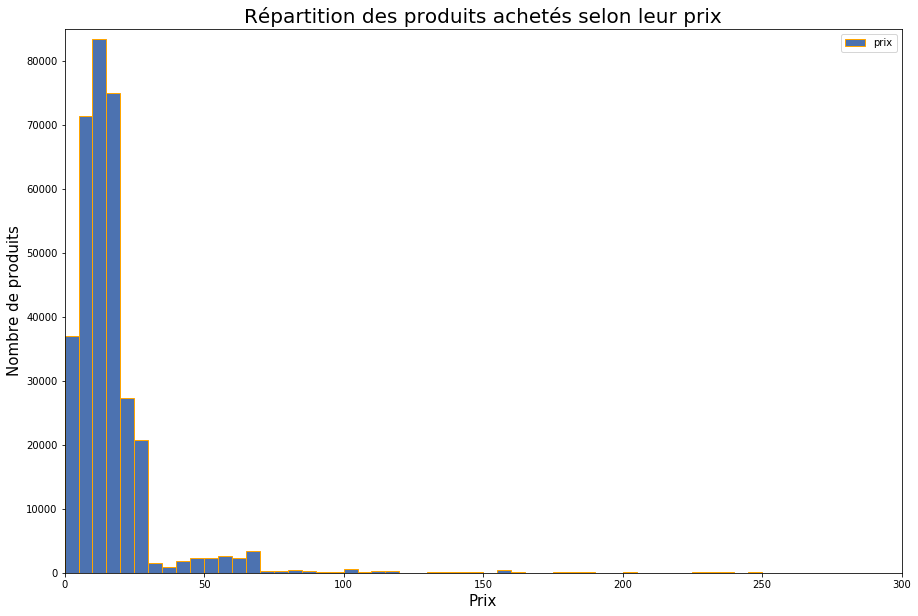

In [45]:

df_ProduitVendu['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix',fontsize=15)
plt.ylabel('Nombre de produits',fontsize=15)
plt.title('Répartition des produits achetés selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 85000])
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph13.png")

plt.show()


In [46]:

print('\n prix maximum : {} €, \n prix minimum : {}€, \n prix moyen : {}€, \n écat-type : {}, \n prix median : {}€, \n prix modale : {}€, \n nombre produits différent : {} '
      .format(df_ProduitVendu.price.min(),
              df_ProduitVendu.price.max(),
              "%.2f" % df_ProduitVendu.price.mean(),
              "%.2f" % df_ProduitVendu.price.std(),
              df_ProduitVendu.price.median(),
              df_ProduitVendu.price.mode()[0],
              df_ProduitVendu.id_prod.value_counts().sum()
             ))

    


 prix maximum : 0.62 €, 
 prix minimum : 300.0€, 
 prix moyen : 17.21€, 
 écat-type : 17.85, 
 prix median : 13.9€, 
 prix modale : 15.99€, 
 nombre produits différent : 336816 


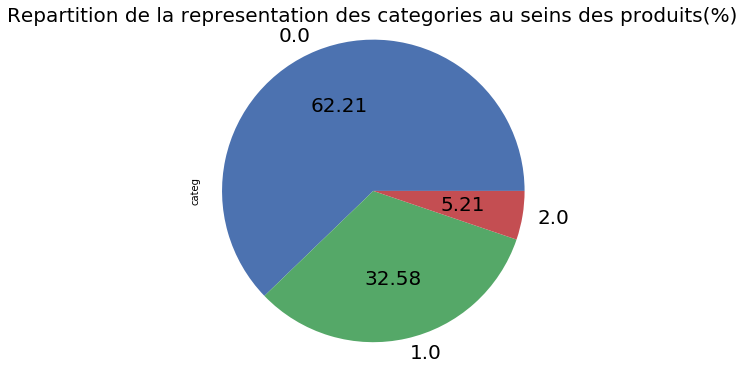

In [47]:

df_ProduitVendu.categ.value_counts().plot.pie(autopct='%.2f', figsize=(6,6), fontsize=20)
plt.title('Repartition de la representation des categories au seins des produits(%)', fontsize=20)
plt.axis('equal')
plt.savefig(dossierImg + "graph14.png")

plt.show()



On peut voir que nos produits suivent une répartition d'achats par catégorie assez similaire à la répartition de catégorie dans le catalogue produit.


In [48]:

df_NbAchatParProduits = pd.pivot_table(tab_transactionsComplete, values='client_id', index='id_prod', aggfunc='count')
df_NbAchatParProduits.sort_values(by='client_id', ascending=False).head(10)


,client_id
id_prod,
1_369,1081
1_417,1062
1_498,1036
1_414,1027
1_425,1013
1_398,952
1_406,946
1_413,944
1_403,939



Voici la liste des 10 produits les mieux vendus


In [49]:

len(df_ProduitVendu.id_prod.value_counts()[df_ProduitVendu.id_prod.value_counts() <= 20])


1445


Nous pouvons voir que 1445 de nos produits ne se sont vendus que 20 fois au cours de l'année.


In [50]:

#Nombres de prouits non vendu
len(pro.id_prod.unique()) - len(df_ProduitVendu.id_prod.unique())


21

In [51]:
pro[~pro.id_prod.isin(df_ProduitVendu.id_prod.unique())]

,id_prod,price,categ
184,0_1016,35.06,0
279,0_1780,1.67,0
736,0_1062,20.08,0
793,0_1119,2.99,0
810,0_1014,1.15,0
845,1_0,31.82,1
1030,0_1318,20.92,0
1138,0_1800,22.05,0
1346,0_1645,2.99,0
1504,0_322,2.99,0


Nous avons également les 21 produits ci-dessus qui ne sont jamais vendus cette année.


### Répartition des achats par catégories


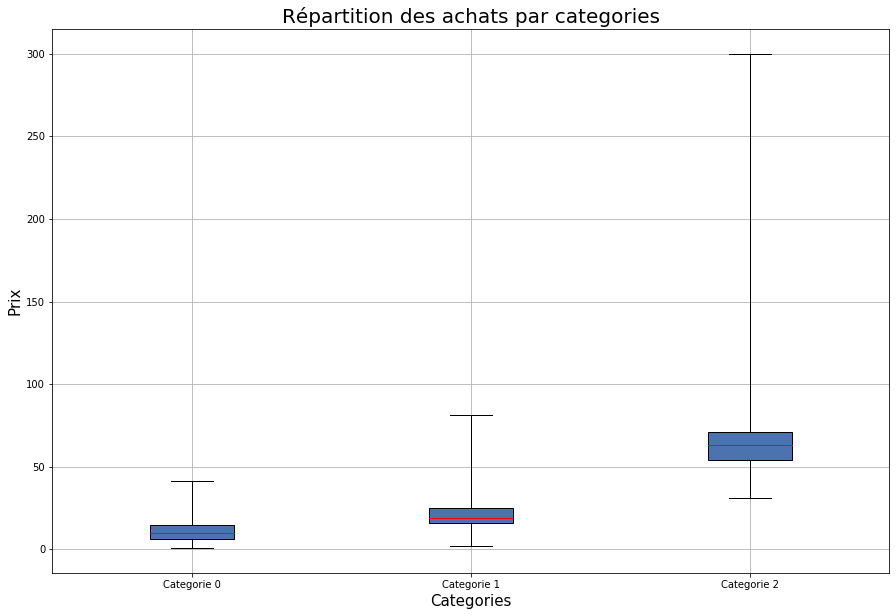

In [52]:

repParCateg = tab_transactionsComplete.copy()
repParCateg = repParCateg.drop(columns=['date','id_prod','session_id','client_id', 'birth', 'age', 'sex'])

#creation de sous liste
prixCateg0 = repParCateg[repParCateg['categ'] == 0 ]['price']
prixCateg1 = repParCateg[repParCateg['categ'] == 1 ]['price']
prixCateg2 = repParCateg[repParCateg['categ'] == 2 ]['price']

#Taille de la figure
plt.figure(figsize=(15,10))

#Creation du boxplot
boxplotElements  = plt.boxplot([prixCateg0,prixCateg1,prixCateg2],
            whis = 'range',
           patch_artist=True)

#coloration de  la median
for element in boxplotElements['medians']:
    element.set_color('red')
    element.set_linewidth(1)

#Details du graph
plt.gca().xaxis.set_ticklabels(['Categorie 0', 'Categorie 1', 'Categorie 2'])   
plt.ylabel('Prix', fontsize=15)
plt.xlabel('Categories', fontsize=15)
plt.title('Répartition des achats par categories', fontsize=20)
plt.grid(True)
plt.savefig(dossierImg + "graph15.png")

plt.show()


La même observation que dans le catalogue peut être faite, les produits non pas la même répartition. Mais nous pouvons voir que l'écart entre les quartiles de la catégorie 2 est moins important que dans le catalogue.


In [53]:

categ = 0
while categ <=2:
    print("---------------------------------------------------------------------------------")
    print('Catégorie {} , \n prix maximum : {} €, \n prix minimum : {}€, \n prix moyen : {}€, \n écat-type : {}, \n variance : {}, \n prix median : {}€, \n prix modale : {}€, \n nombre produits différent : {} '
          .format(categ,
                  tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.min(),
                  tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.max(),
                  "%.2f" % tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.mean(),
                  "%.2f" % tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.std(),
                  "%.2f" % tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.var(), 
                  tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.median(),
                  tab_transactionsComplete[tab_transactionsComplete.categ == categ].price.mode()[0],
                  tab_transactionsComplete[tab_transactionsComplete.categ == categ].id_prod.value_counts().sum()
                 ))
    categ +=1
    

---------------------------------------------------------------------------------
Catégorie 0 , 
 prix maximum : 0.62 €, 
 prix minimum : 40.99€, 
 prix moyen : 10.65€, 
 écat-type : 4.93, 
 variance : 24.29, 
 prix median : 9.99€, 
 prix modale : 4.99€, 
 nombre produits différent : 209529 
---------------------------------------------------------------------------------
Catégorie 1 , 
 prix maximum : 2.0 €, 
 prix minimum : 80.99€, 
 prix moyen : 20.48€, 
 écat-type : 7.57, 
 variance : 57.29, 
 prix median : 19.08€, 
 prix modale : 15.99€, 
 nombre produits différent : 109735 
---------------------------------------------------------------------------------
Catégorie 2 , 
 prix maximum : 30.99 €, 
 prix minimum : 300.0€, 
 prix moyen : 75.17€, 
 écat-type : 39.08, 
 variance : 1527.25, 
 prix median : 62.83€, 
 prix modale : 68.99€, 
 nombre produits différent : 17552 



### Répartition des achats par catégories en fonction de l'âge du client.


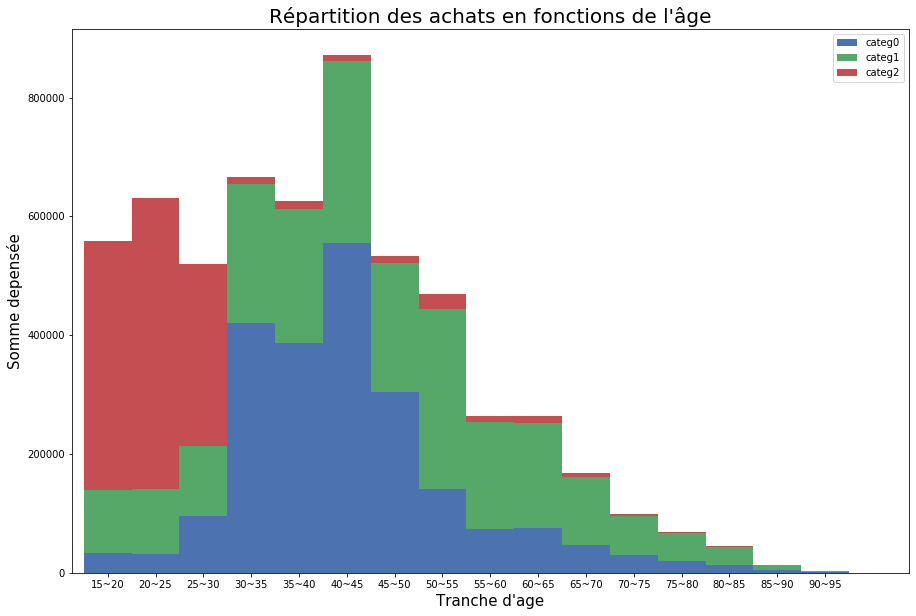

In [54]:

repAchatAgeCateg = pd.pivot_table(tab_transactionsComplete, values='price',index='age', columns='categ', aggfunc='sum' )
repAchatAgeCateg = repAchatAgeCateg.reset_index()
repAchatAgeCateg.head()   
taille_classe = 5.0 
groupes = []



tranches = np.arange(15,100,tranche_age)

for ind, tr in enumerate(tranches):
        a = 0
        a = repAchatAgeCateg[(repAchatAgeCateg['age'] >= tr) & (repAchatAgeCateg['age'] < tr+taille_classe)].sum()
        g={'age':'{}~{}'.format(tr, tr+tranche_age),
           'categ0':a[0],
           'categ1':a[1],
           'categ2':a[2]}
        groupes.append(g)

groupes = pd.DataFrame(groupes)
groupes = groupes.round(3)

groupes[['categ0','categ1','categ2']].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=1)

plt.xticks(np.arange(0, 16, 1),(groupes.age))
plt.xlabel("Tranche d'age",fontsize=15)
plt.ylabel("Somme depensée",fontsize=15)
plt.title("Répartition des achats en fonctions de l'âge",fontsize=20)
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph16.png")

plt.show()



### Évolution annuelle du CA par catégories 


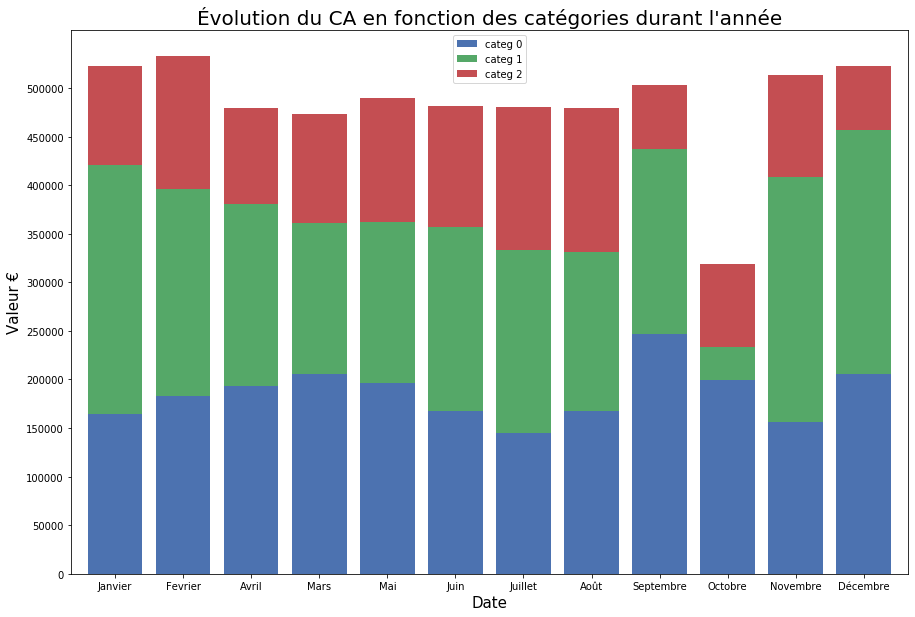

In [55]:

evoCACateg = pd.pivot_table(tab_transactionsComplete, values='price', index= tab_transactionsComplete.date.dt.month, columns='categ', aggfunc='sum')
evoCACateg = evoCACateg.reset_index()

evoCACateg[[0,1,2]].plot(kind='bar', stacked=True,rot=0,figsize=(15,10),width=0.8)

plt.xticks(np.arange(0, 12, 1),('Janvier','Fevrier','Avril','Mars','Mai','Juin','Juillet','Août','Septembre', 'Octobre', 'Novembre','Décembre'))
plt.yticks(np.arange(0, 550000, 50000))
plt.xlabel('Date',fontsize=15)
plt.ylabel("Valeur €",fontsize=15)
plt.title("Évolution du CA en fonction des catégories durant l'année",fontsize=20)
plt.grid(False)
plt.legend(['categ 0','categ 1','categ 2'])
plt.savefig(dossierImg + "graph17.png")

plt.show()



# Etude des paniers

Étudions à présent les paniers des clients, nous observeront également leurs évolutions tout au long de cette année, et ainsi nous pourrons sortir les périodes les plus populaires auprès des clients.


In [56]:

#Prix des sessions, ou paniers
toutPanierAnnee = pd.pivot_table(tab_transactionsComplete, values='price', index='session_id', aggfunc='sum')

# 1 session = 1 panier
toutPanierAnnee.head()


,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [57]:
print("Prix panier moyen = {}€, \n Prix panier median = {}€, \n Prix panier modale = {}€,  \n ecart-type : {},  \n nombre de paniers {}"
      .format("%.2f" % toutPanierAnnee.mean(),
              "%.2f" %  toutPanierAnnee.median()[0],
              toutPanierAnnee.mode().values[0][0],
              "%.2f" % toutPanierAnnee.std()[0],
              toutPanierAnnee.size))


Prix panier moyen = 34.27€, 
 Prix panier median = 25.57€, 
 Prix panier modale = 15.99€,  
 ecart-type : 31.87,  
 nombre de paniers 169194



### Paniers par client


In [58]:

#Tout les paniers pour chaque client
toutPanierAnneeParClient = pd.pivot_table(tab_transactionsComplete, values='session_id', index='client_id', aggfunc='count')


toutPanierAnneeParClient.head()


,session_id
client_id,
c_1,20
c_10,28
c_100,6
c_1000,56
c_1001,58


In [59]:

print("\n Nombre moyen de panier : {}, \n Nombre median de panier : {}, \n Nombre modale de panier : {}, \n ecart-type : {}, \n Nombre minimum de panier : {}, \n Nombre maximum de panier: {}"
      .format("%.2f" % toutPanierAnneeParClient.mean(),
              "%.2f" %  toutPanierAnneeParClient.median(),
              toutPanierAnneeParClient.mode().values[0][0],
              "%.2f" % toutPanierAnneeParClient.std(),
              toutPanierAnneeParClient.min()[0],
              toutPanierAnneeParClient.max()[0]
             ))



 Nombre moyen de panier : 39.16, 
 Nombre median de panier : 25.00, 
 Nombre modale de panier : 13, 
 ecart-type : 156.45, 
 Nombre minimum de panier : 1, 
 Nombre maximum de panier: 12855


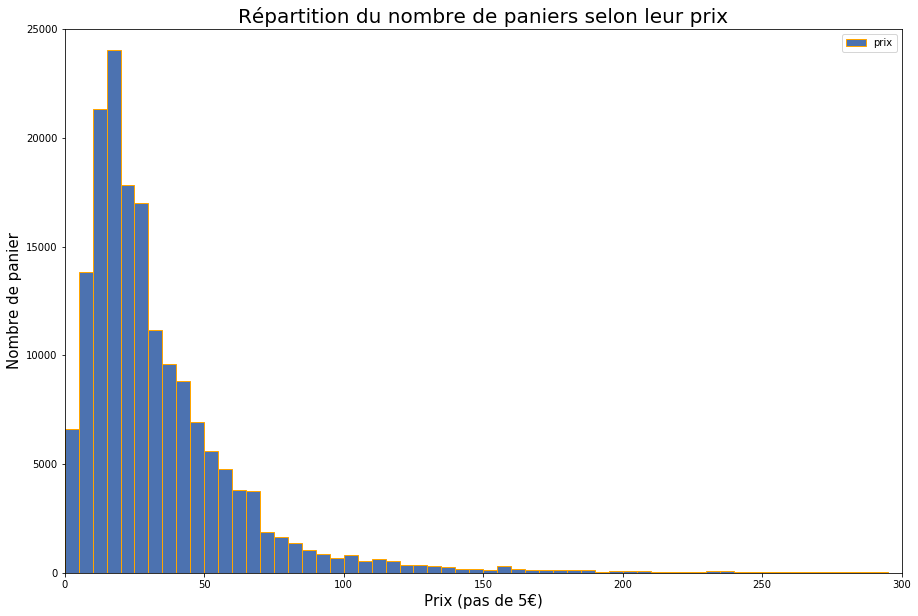

In [60]:

#Répartition du nombre de paniers selon leur prix
toutPanierAnnee['price'].plot.hist(figsize=(15,10),bins = range(0,300,5) , edgecolor = 'orange', label='prix')
plt.xlabel('Prix (pas de 5€)',fontsize=15)
plt.ylabel('Nombre de panier',fontsize=15)
plt.title('Répartition du nombre de paniers selon leur prix',fontsize=20)
plt.axis([0, 300, 0, 25000])
plt.grid(False)
plt.legend()
plt.savefig(dossierImg + "graph18.png")

plt.show()



Comme nous pouvons le voir, nous avons une majoritée de panier qui ne dépasse pas les 50 € de produits


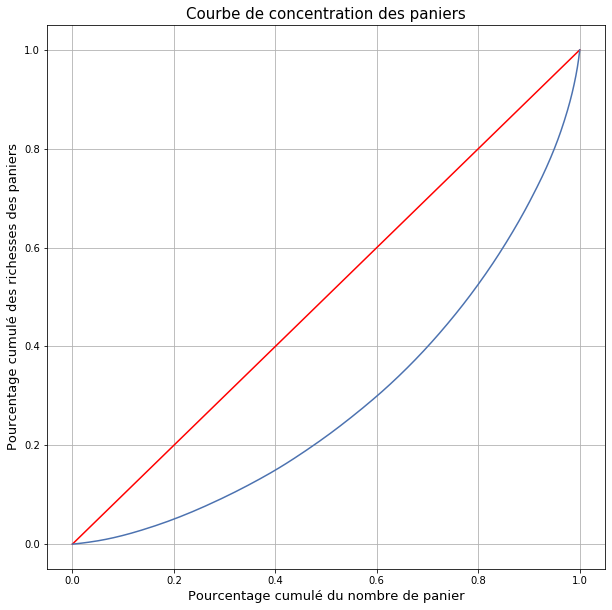

In [61]:

tab_panierLorenz = toutPanierAnnee.copy()
tab_panierLorenz = tab_panierLorenz.sort_values(by='price')
tab_panierLorenz = tab_panierLorenz.reset_index()

dep = tab_panierLorenz['price'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(10,10))
plt.plot([0.0, 1.0],color='red')
plt.plot(np.linspace(0,1,len(lorenz)),lorenz)

plt.title('Courbe de concentration des paniers', fontsize=15)
plt.ylabel('Pourcentage cumulé des richesses des paniers', fontsize=13)
plt.xlabel('Pourcentage cumulé du nombre de panier', fontsize=13)
plt.grid(True)
plt.savefig(dossierImg + "graph19.png")

plt.show()


In [62]:

# Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où : "[:-1]"
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) 

# Aire entre la 1e bissectrice et la courbe de Lorenz.
S = 0.5 - aire_ss_courbe 
gini = 2*S

gini


0.42046210685900987


Nous pouvons finalement observer une chose. Les paniers de nos clients sont très majoritairement sous la barre des 50 €,  tantdis qu'il existe quelques paniers "très chers".



# Corrélation

Dans cette dernière partie nous allons observer les corrélations entre les différentes données



## Corrélation: Sexes Catégories


In [80]:

corrSexCateg = tab_transactionsComplete[['sex','categ']].pivot_table(index='sex', columns='categ', aggfunc=len)
matriceCorrSexCateg = corrSexCateg.copy()

tx = tab_transactionsComplete['sex'].value_counts()
ty = tab_transactionsComplete['categ'].value_counts()

matriceCorrSexCateg.loc[:,'Total'] = tx
matriceCorrSexCateg.loc['total',:] = ty
matriceCorrSexCateg.loc['total','Total'] = len(tab_transactionsComplete)

matriceCorrSexCateg


categ,0.0,1.0,2.0,Total
sex,,,,
f,103846.0,55469.0,8260.0,167575.0
m,105683.0,54266.0,9292.0,169241.0
total,209529.0,109735.0,17552.0,336816.0


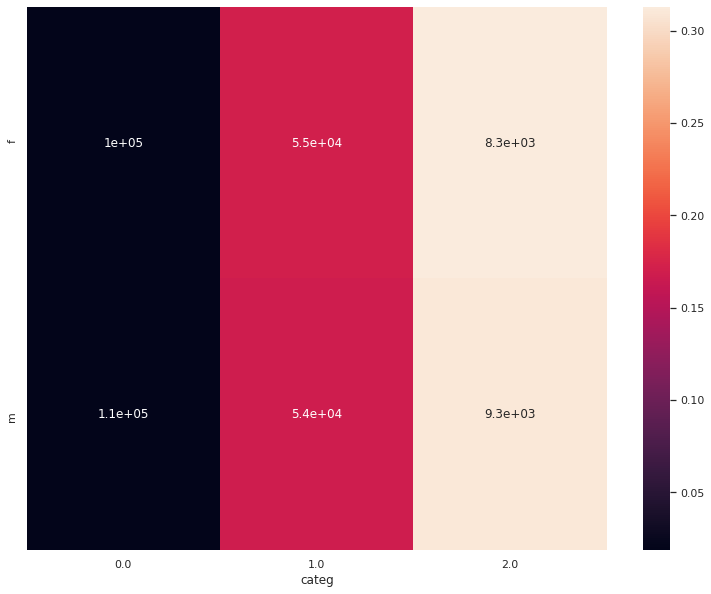

In [81]:

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(tab_transactionsComplete)
indep = tx.dot(ty.T) / n

mesure = (corrSexCateg-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=corrSexCateg)
sns.set(rc={'figure.figsize':(13,10)})
plt.savefig(dossierImg + "graph20.png")

plt.show()



## Corrélation: Âges et montant total d'achat


In [65]:

tdf_CAgeAchatTotal = pd.pivot_table(tab_transactionsComplete,values='price', index=['client_id','age'], aggfunc='sum')
tdf_CAgeAchatTotal = tdf_CAgeAchatTotal.reset_index()

tdf_CAgeAchatTotal_mean = pd.pivot_table(tdf_CAgeAchatTotal, index=['age'], values="price",aggfunc='mean')
tdf_CAgeAchatTotal_mean = tdf_CAgeAchatTotal_mean.reset_index()
tdf_CAgeAchatTotal_mean.head()


,age,price
0,16,675.945034
1,17,610.078552
2,18,620.142530
3,19,679.051840
4,20,589.048286


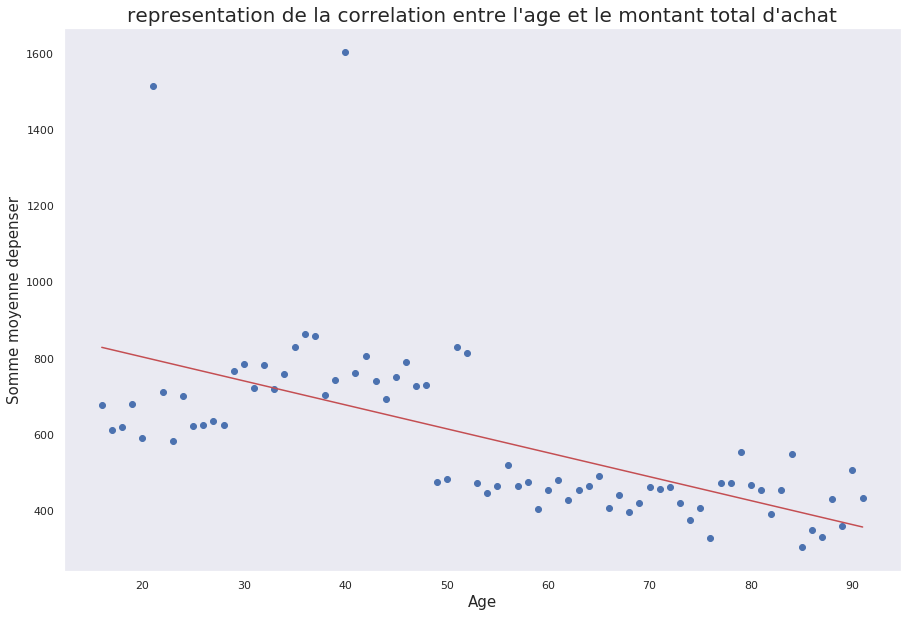

In [66]:

X = tdf_CAgeAchatTotal_mean['age']
Y = tdf_CAgeAchatTotal_mean['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Somme moyenne dépensé",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et le montant total d'achat",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph21.png")

plt.show()


In [67]:

st.pearsonr(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'])[0]


-0.6255483384509141

In [68]:

np.cov(tdf_CAgeAchatTotal_mean['age'], tdf_CAgeAchatTotal_mean['price'],ddof=0)[1,0]


-3027.1534911393555


On ne peut ,donc grace à la droite de régression et au coef de Pearson, voire qu'il y a une corrélation entre l'âge et le montant total des achats



### Version sans valeur très élevée

Nous pouvons voir deux valeurs très élever par rapport aux autres et elle dévie notre droite de prédiction. Regardons sans eux.


In [90]:

tdf_CAgeAchatTotal_mean.sort_values(by="price", ascending=False).head(5)


,age,price
24,40,1602.471904
5,21,1514.291384
20,36,864.026244
21,37,858.712290
35,51,830.216130


In [91]:

tab_CorrAgeTotalAchatSansOutlier = tdf_CAgeAchatTotal_mean.drop(index=[5,24])


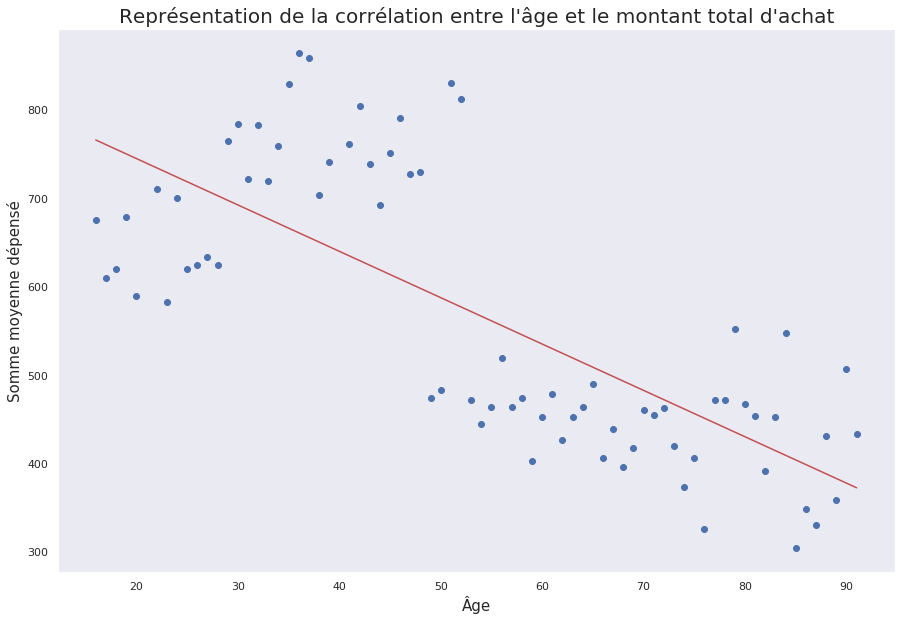

In [93]:

X = tab_CorrAgeTotalAchatSansOutlier['age']
Y = tab_CorrAgeTotalAchatSansOutlier['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Somme moyenne dépensé",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et le montant total d'achat",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph21-2.png")

plt.show()



### Version sans valeur très élevée et deux groupes

Sans nous valeur élever nous pouvons voir la formation plus distincte de deux groupes. Nous allons regarder leur corrélation individuelle


In [102]:
tab_CorrAgeTotalAchatSansOutlier_1 = tab_CorrAgeTotalAchatSansOutlier[tab_CorrAgeTotalAchatSansOutlier.price > 560]
tab_CorrAgeTotalAchatSansOutlier_2 = tab_CorrAgeTotalAchatSansOutlier[tab_CorrAgeTotalAchatSansOutlier.price <= 560]

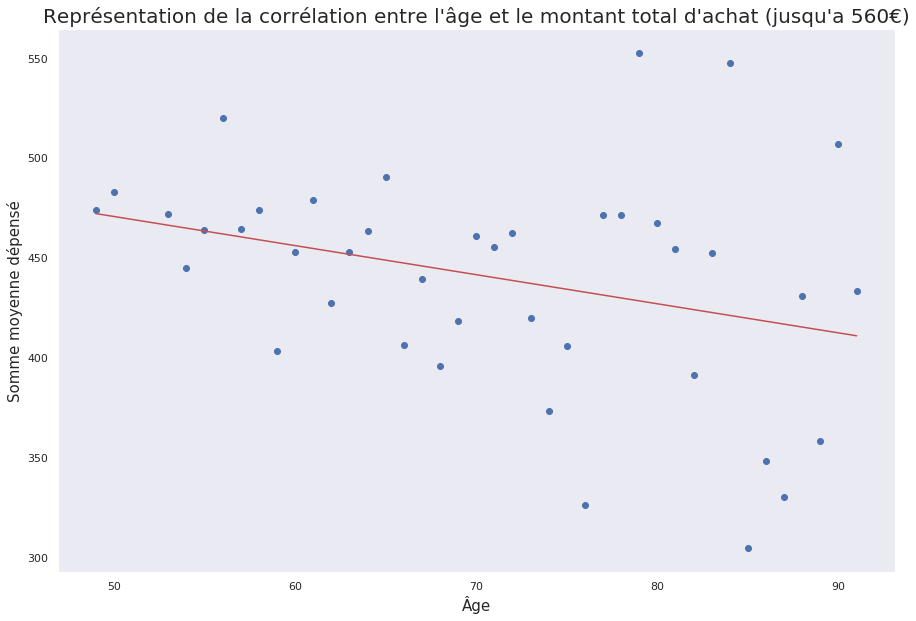

In [103]:

X = tab_CorrAgeTotalAchatSansOutlier_2['age']
Y = tab_CorrAgeTotalAchatSansOutlier_2['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Somme moyenne dépensé",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et le montant total d'achat (jusqu'a 560€)",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph21-3.png")

plt.show()


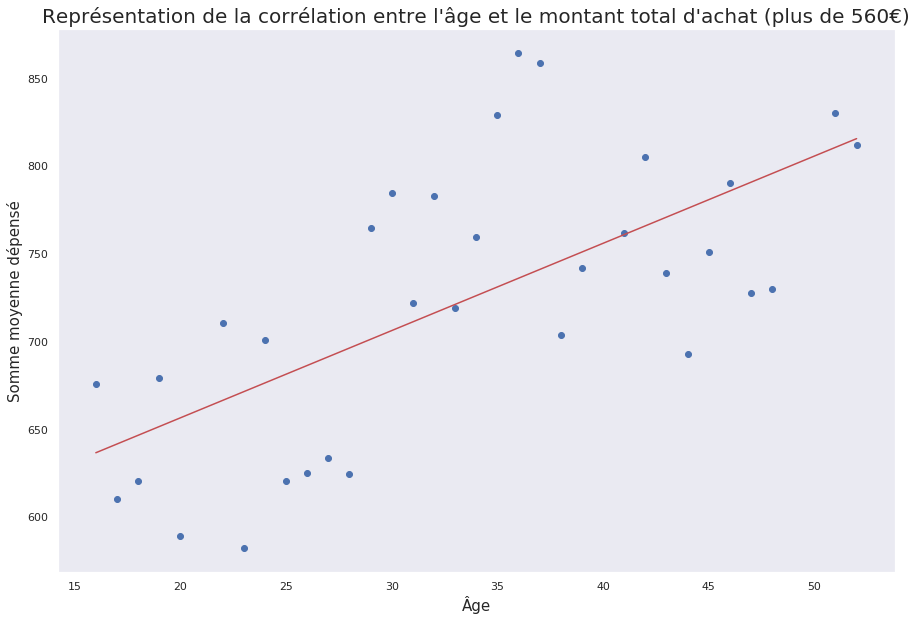

In [104]:

X = tab_CorrAgeTotalAchatSansOutlier_1['age']
Y = tab_CorrAgeTotalAchatSansOutlier_1['price']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Somme moyenne dépensé",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et le montant total d'achat (plus de 560€)",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph21-4.png")

plt.show()



Nous avons à présent une corrélation avec l'âge un peut plus précise.


## Correlation: Age et fréquence d'achat

In [82]:

tempo1 = pd.pivot_table(tab_transactionsComplete,values="session_id", index=['age',tab_transactionsComplete.date.dt.month], aggfunc='count')
tempo1 = tempo1.reset_index()

#Nombre moyen d'article par client
tab_corrAgeFreq = pd.pivot_table(tempo1, index=['age'], values="session_id",aggfunc='mean')
tab_corrAgeFreq = tab_corrAgeFreq.reset_index()


In [83]:

corTailleClasse = 5
corGroupes = []



corTrancheAge = np.arange(15,100,corTailleClasse)

for ind, tr in enumerate(corTrancheAge):
        a = 0
        a = tab_corrAgeFreq[(tab_corrAgeFreq['age'] >= tr) & (tab_corrAgeFreq['age'] < tr+corTailleClasse)]['session_id'].sum()
        g={
            'age':tr,
            'Nombre achat moyen par mois':a}
        corGroupes.append(g)

corGroupes = pd.DataFrame(corGroupes)
corGroupes = corGroupes[:-1]

corGroupes = corGroupes[['age', 'Nombre achat moyen par mois']]


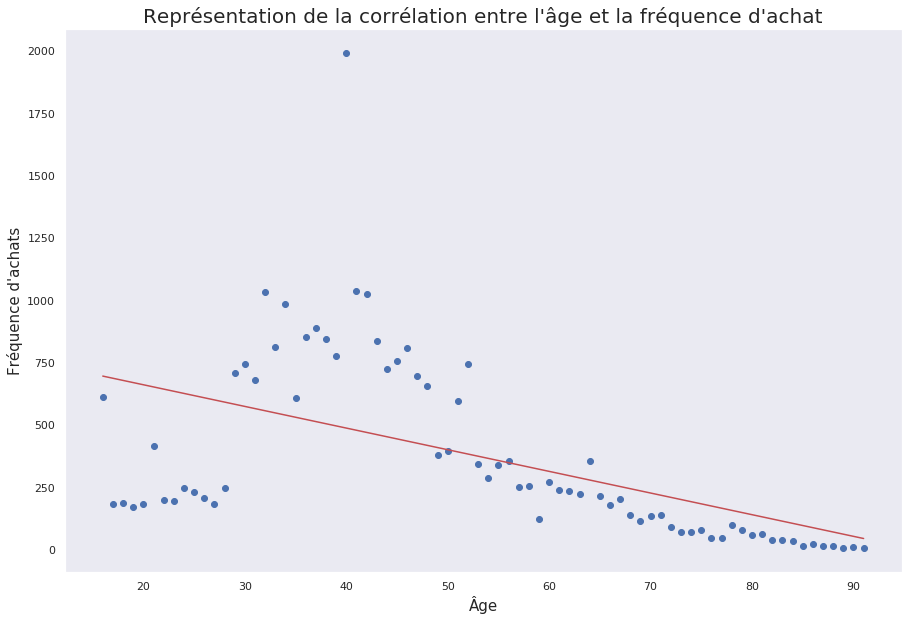

In [106]:

X = tab_corrAgeFreq['age']
Y = tab_corrAgeFreq['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Fréquence d'achats",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et la fréquence d'achat",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph22.png")

plt.show()


In [85]:

st.pearsonr(corGroupes['age'], corGroupes['Nombre achat moyen par mois'])[0]


-0.5713184766808359

In [86]:

np.cov(corGroupes['age'], corGroupes['Nombre achat moyen par mois'],ddof=0)[1,0]


-21415.703125


On peut voir qu'il y a une corrélation entre l'âge des clients et leur fréquence d'achat.



## Groupe d'âge

Comme précédement nous pouvons voir qu'il semble y avoir plusieurs groupes d'age


In [108]:
group1 = tab_corrAgeFreq[tab_corrAgeFreq.age < 30]
group2 = tab_corrAgeFreq[(tab_corrAgeFreq.age >= 30) & (tab_corrAgeFreq.age <= 55)]
group3 = tab_corrAgeFreq[tab_corrAgeFreq.age > 55]

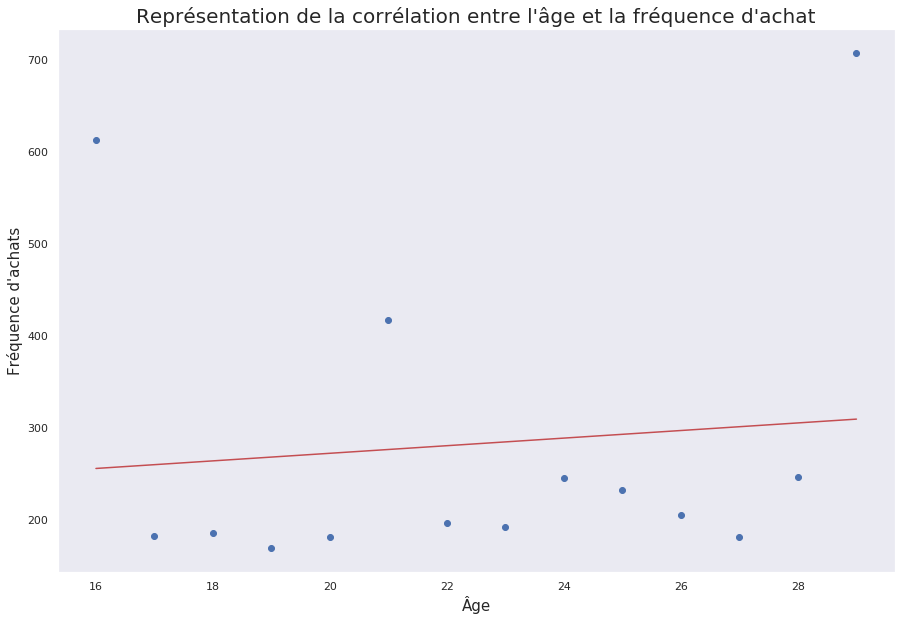

In [109]:

X = group1['age']
Y = group1['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Fréquence d'achats",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et la fréquence d'achat (groupe Age1)",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph22.png")

plt.show()


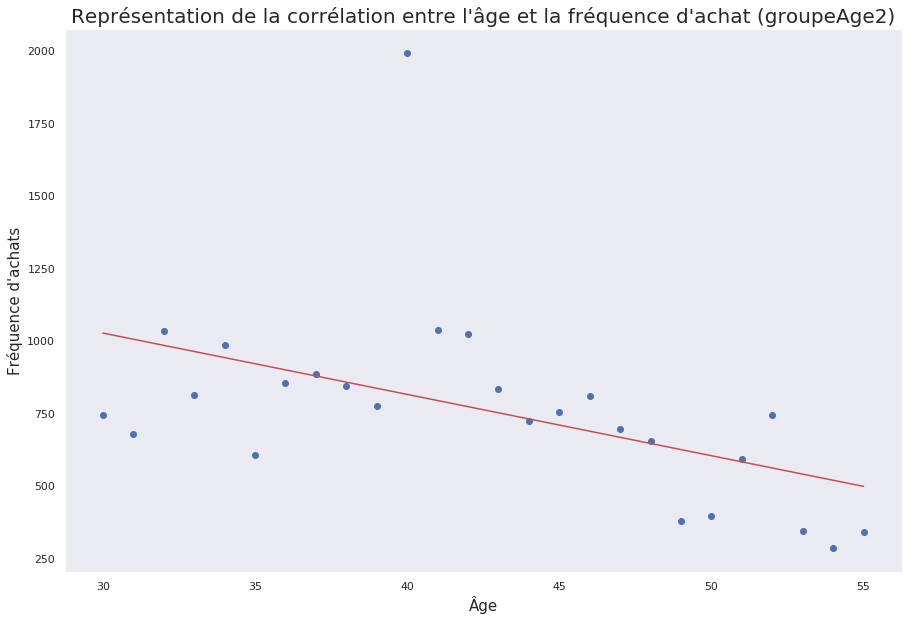

In [112]:

X = group2['age']
Y = group2['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Fréquence d'achats",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et la fréquence d'achat (groupeAge2)",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph22.png")

plt.show()


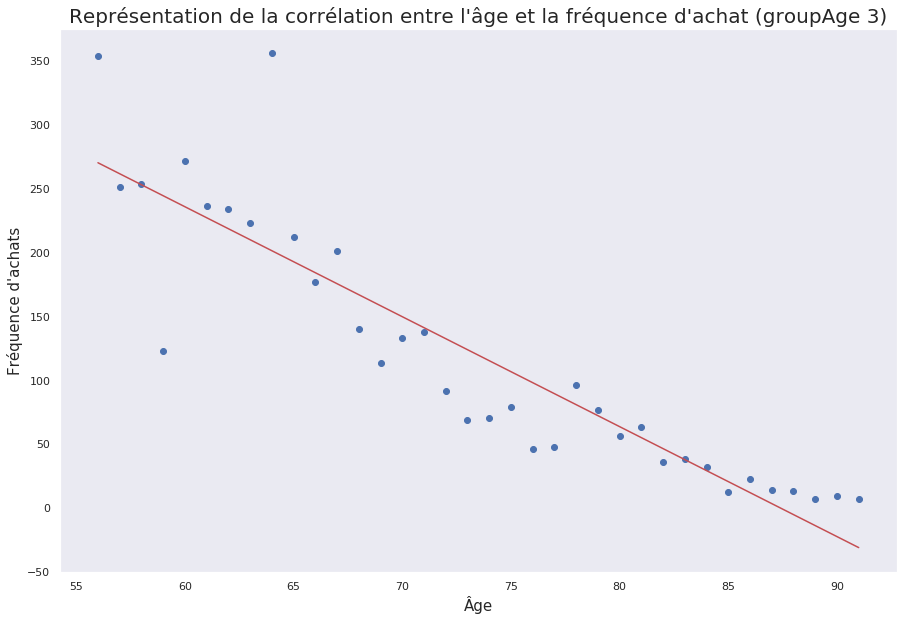

In [113]:

X = group3['age']
Y = group3['session_id']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Âge',fontsize=15)
plt.ylabel("Fréquence d'achats",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et la fréquence d'achat (groupAge 3)",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph22.png")

plt.show()


Nous avons encore une fois une corrélation mais un peut plus précise maintenant

## Correlation: Age et nombre de produits moyen acheté -----------------------------------------



In [74]:

#regroupe le nb d'article par session
tdf_CAgePanierMoy = pd.pivot_table(tab_transactionsComplete, values='id_prod',index=['client_id','age','session_id'], aggfunc='count')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()

#Nombre moyen d'article par client
tdf_CAgePanierMoy = pd.pivot_table(tdf_CAgePanierMoy,index=['age'],values="id_prod",aggfunc='mean')
tdf_CAgePanierMoy = tdf_CAgePanierMoy.reset_index()
tdf_CAgePanierMoy.columns = ['age','nb_prod']
tdf_CAgePanierMoy.head()


,age,nb_prod
0,16,1.757054
1,17,1.724901
2,18,1.742947
3,19,1.732310
4,20,1.843220


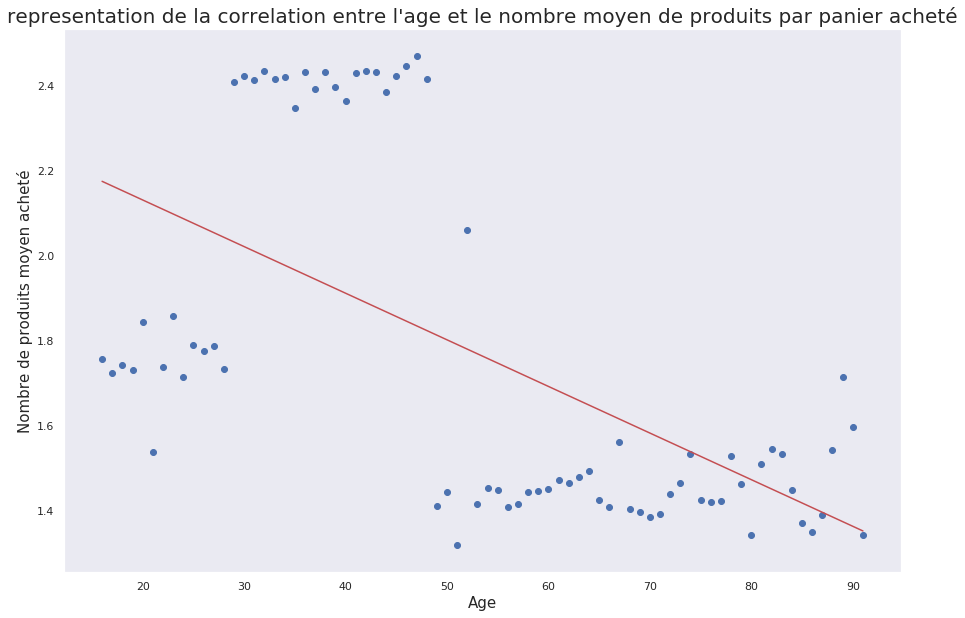

In [75]:

X = tdf_CAgePanierMoy['age']
Y = tdf_CAgePanierMoy['nb_prod']


slope, intercept, r_value, p_value, std_err = st.linregress(X, Y)

def predict(x):
   return slope * x + intercept

fitLine = predict(X)

plt.figure(figsize=(15,10))
axes = plt.axes()
axes.grid() 
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.xlabel('Age',fontsize=15)
plt.ylabel("Nombre de produits moyens achetés",fontsize=15)
plt.title("Représentation de la corrélation entre l'âge et le nombre moyen de produits par panier acheté",fontsize=20)
plt.grid(False)
plt.savefig(dossierImg + "graph23.png")

plt.show()


In [76]:

st.pearsonr(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'])[0]


-0.5808288928810568

In [77]:

np.cov(tdf_CAgePanierMoy['age'], tdf_CAgePanierMoy['nb_prod'],ddof=0)[1,0]


-5.271530370552438

Encore une fois en prenant le coef et la representation graph on peut voire qu'il y a une correlation entre les deux variable

## Correlation: Age et categories acheté

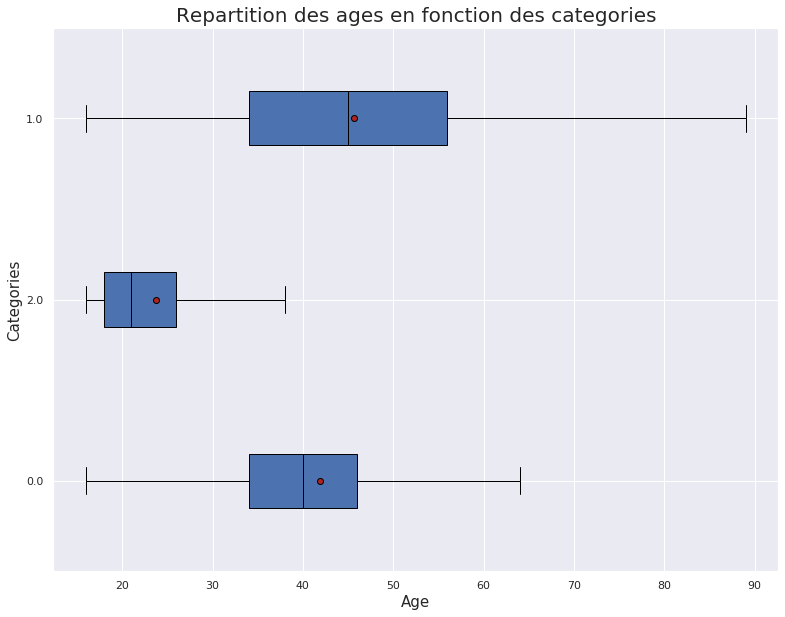

In [78]:
X = 'categ'
Y = 'age'

sous_echantillon = tab_transactionsComplete[['age','categ']]


modalites = sous_echantillon[X].unique()
groupesCorr = []
for m in modalites:
    groupesCorr.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupesCorr, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.title('Repartition des ages en fonction des categories', fontsize=20)
plt.ylabel('Categories', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.savefig(dossierImg + "graph24.png")

plt.show()

In [79]:
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = tab_transactionsComplete[['age','categ']]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11884029228184805

Ici notre eta², nous donne un chiffre plutot faible et au vue de ce dernier et des graph il semblerai qu'il existe une faible correlation entre l'age et la categorie acheter par les clients
